<a href="https://colab.research.google.com/github/kunalavghade/Ai/blob/main/Week_4_%E2%80%94_Multi_Layer_Neural_Networks_%26_Backpropagation_(From_Scratch).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 4 — Multi-Layer Neural Networks & Backpropagation (From Scratch)

## Goal
Understand **why depth matters** and how **backpropagation** enables neural networks to learn non-linear functions such as XOR.

By the end of this week, you should:
- Understand multi-layer neural networks mathematically
- Derive backpropagation using the chain rule
- Implement a 2-layer neural network from scratch
- Solve XOR without using ML frameworks

---

## 1. Why Do We Need Multiple Layers?

Single-layer models compute:

w·x + b

This is a **linear function**.

To learn non-linear patterns, we need:
- Intermediate transformations
- Stacked non-linearities
- Function composition

This is achieved using **hidden layers**.

---

## 2. Structure of a Multi-Layer Neural Network

A simple 2-layer network:

Input → Hidden Layer → Output

Mathematically:

z₁ = W₁x + b₁  
a₁ = g(z₁)  

z₂ = W₂a₁ + b₂  
ŷ = σ(z₂)

Where:
- g(·) is a non-linear activation (ReLU / tanh / sigmoid)
- σ(·) is sigmoid for binary classification

---

## 3. Forward Propagation

Forward propagation computes predictions step-by-step:

1. Linear transformation
2. Activation
3. Repeat for next layer

This is just function composition.

---

## 4. Non-Linearity Is the Key

Without activation functions:
- Stacking layers collapses into a single linear function
- Depth provides no benefit

Activations introduce **non-linearity**, enabling complex decision boundaries.

---

## 5. Common Activation Functions

### Sigmoid
σ(z) = 1 / (1 + e⁻ᶻ)

- Smooth
- Saturates at extremes
- Used in output layer

### Tanh
tanh(z) ∈ (−1, 1)

- Zero-centered
- Better gradients than sigmoid

### ReLU
ReLU(z) = max(0, z)

- Sparse activations
- Fast convergence
- Most commonly used

---

## 6. Loss Function (Binary Classification)

Binary Cross-Entropy:

L = −[y log(ŷ) + (1 − y) log(1 − ŷ)]

This loss is applied **only at the output layer**.

---

## 7. The Backpropagation Problem

Question:
> How do we update weights in hidden layers when they don’t directly see the loss?

Answer:
> Use the **chain rule** to propagate error backward.

Backpropagation is:
- Not magic
- Just repeated application of calculus

---

## 8. Chain Rule (Core Idea)

If:
f(x) = h(g(x))

Then:
df/dx = (df/dh) · (dh/dg) · (dg/dx)

Neural networks are nested functions → chain rule applies naturally.

---

## 9. Backpropagation Intuition

Backpropagation computes:
- How much each parameter contributed to the final error
- Assigns blame proportionally

Each layer receives:
- Error from the layer above
- Scales it by its local gradient

---

## 10. Backpropagation Equations (High Level)

Output layer error:
δ₂ = ŷ − y

Hidden layer error:
δ₁ = (W₂ᵀ δ₂) ⊙ g′(z₁)

Gradients:
∂L/∂W₂ = δ₂ a₁ᵀ  
∂L/∂b₂ = δ₂  

∂L/∂W₁ = δ₁ xᵀ  
∂L/∂b₁ = δ₁  

⊙ = element-wise multiplication

---

## 11. Gradient Descent Update

For each parameter θ:

θ = θ − α ∂L/∂θ

This is applied to:
- All weights
- All biases
- All layers

---

## 12. Solving XOR

Hidden layer learns intermediate features:
- OR-like behavior
- AND-like behavior

Output layer combines them to solve XOR.

This demonstrates the **power of depth**.

---

## Coding Questions (NumPy Only)

### Question 1: Activation Functions
Implement:
- Sigmoid + derivative
- ReLU + derivative
- Tanh + derivative

---

### Question 2: Forward Pass
Implement forward propagation for:
- 2-layer neural network
- Vectorized batch input

---

### Question 3: Backpropagation
Implement backpropagation using:
- Manual chain rule
- No automatic differentiation

---

### Question 4: XOR Training
Train your network on XOR dataset.
- Track loss
- Verify convergence

---

### Question 5: Visualization
Visualize:
- Loss vs epochs
- Decision boundary evolution

---

### Question 6: Experiments
Try:
- Different hidden layer sizes
- Different activations
- Different learning rates

Observe:
- Convergence speed
- Stability

---

### Question 7: Conceptual (Write Answers)
1. Why does depth increase expressive power?
2. Why is non-linearity essential?
3. What role does the chain rule play?
4. Why does backprop scale to deep networks?

---

## Outcome of Week 4

After completing this week, you should:
- Fully understand backpropagation
- Solve XOR confidently
- Understand how deep learning actually works
- Be ready to scale to real datasets


In [1]:
import numpy as np
import matplotlib.pyplot as plt

**Question 1: Activation Functions (+ Derivatives)**

In [9]:
def sigmoid(z):
  return 1 / (1 + np.exp(-z))

def sigmoid_prime(z):
  s = sigmoid(z)
  return s * (1 - s)

def relu(z):
  return np.maximum(0, z)

def relu_prime(z):
  return (z > 0).astype(float)

def tanh(z):
  return np.tanh(z)

def tanh_prime(z):
  return 1 - np.tanh(z) ** 2

In [4]:
z = np.linspace(-10 , 10 , 400)

Plot Activations

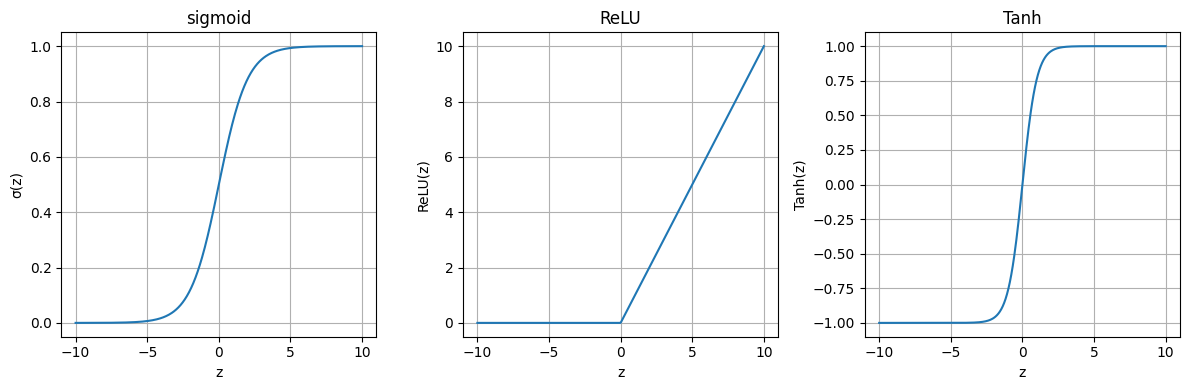

In [7]:
plt.figure(figsize=(12, 4))

# sigmoid
plt.subplot(1, 3, 1)
plt.plot(z, sigmoid(z))
plt.title('sigmoid')
plt.ylabel("σ(z)")
plt.xlabel("z")
plt.grid(True)


# ReLU
plt.subplot(1, 3, 2)
plt.plot(z, relu(z))
plt.title('ReLU')
plt.xlabel("z")
plt.ylabel("ReLU(z)")
plt.grid(True)


# Tanh
plt.subplot(1, 3, 3)
plt.plot(z, tanh(z))
plt.title('Tanh')
plt.xlabel("z")
plt.ylabel("Tanh(z)")
plt.grid(True)

plt.tight_layout()
plt.show()


Visualization of Derivatives (Backprop Insight)

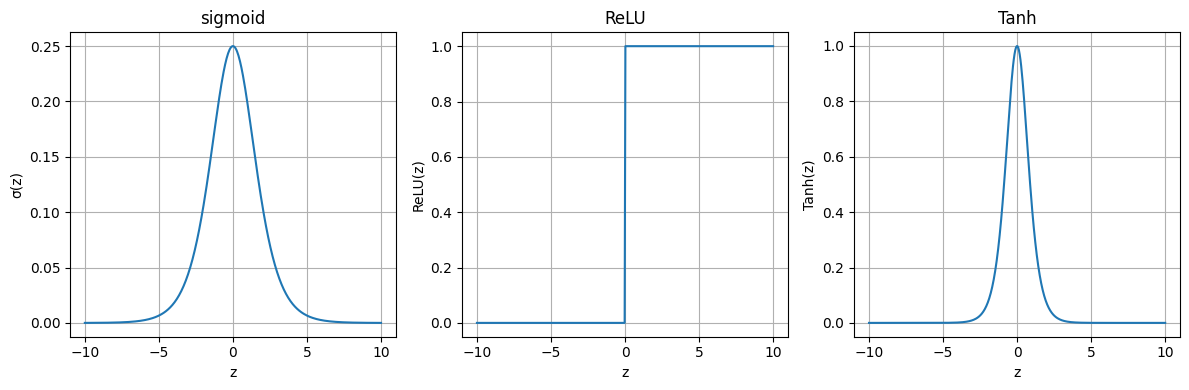

In [10]:
plt.figure(figsize=(12, 4))

# sigmoid derivative
plt.subplot(1, 3, 1)
plt.plot(z, sigmoid_prime(z))
plt.title('sigmoid')
plt.ylabel("σ(z)")
plt.xlabel("z")
plt.grid(True)


# ReLU derivative
plt.subplot(1, 3, 2)
plt.plot(z, relu_prime(z))
plt.title('ReLU')
plt.xlabel("z")
plt.ylabel("ReLU(z)")
plt.grid(True)


# Tanh derivative
plt.subplot(1, 3, 3)
plt.plot(z, tanh_prime(z))
plt.title('Tanh')
plt.xlabel("z")
plt.ylabel("Tanh(z)")
plt.grid(True)

plt.tight_layout()
plt.show()


**Question 2: Forward Pass (2-Layer Network)**

In [13]:
def forward_pass(X, params, activation='tanh'):
  W1, b1, W2, b2 = params

  z1 = X @ W1 + b1

  if activation == 'sigmoid':
    a1 = sigmoid(z1)
  elif activation == 'relu':
    a1 = relu(z1)
  else:
    a1 = tanh(z1)

  z2 = a1 @ W2 + b2
  y_hat = sigmoid(z2)

  cache = (X, z1, a1, z2, y_hat)
  return y_hat, cache


Question 3: Backpropagation (Manual Chain Rule)

In [18]:
def backprop(cache, params, y, activation='tanh'):
  W1, b1, W2, b2 = params
  X, z1, a1, z2, y_hat = cache

  m = X.shape[0]

  # Output Layer
  dz2 = y_hat - y
  dW2 = ( a1.T @ dz2 ) / m
  db2 = np.mean(dz2, axis=0, keepdims=True)

  # Hidden Layer
  da1 = dz2 @ W2.T
  if activation == 'sigmoid':
    dz1 = da1 * sigmoid_prime(z1)
  elif activation == 'relu':
    dz1 = da1 * relu_prime(z1)
  else :
    dz1 = da1 * tanh_prime(z1)

  dW1 = (X.T @ dz1) / m
  db1 = np.mean(dz1, axis=0, keepdims=True)

  return dW1, db1, dW2, db2

**Question 4: XOR Training (From Scratch)**

XOR Dataset

In [20]:
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

y = np.array([[0], [1], [1], [0]], dtype=np.float64)

Training Loop

In [23]:
def train_nn(X, y, hidden_size = 4, lr = 0.1, epochs = 50000, activation = 'tanh'):
  np.random.seed(42);

  W1 = np.random.randn(X.shape[1], hidden_size)
  b1 = np.random.randn(1, hidden_size)
  W2 = np.random.randn(hidden_size, 1)
  b2 = np.random.randn(1, 1)

  params = [W1, b1, W2, b2]
  losses = []

  for epoch in range(epochs):
    y_hat, cache = forward_pass(X, params, activation)
    loss = -np.mean( y  * np.log(y_hat + 1e-8) + (1 - y) * np.log(1 - y_hat + 1e-8))
    losses.append(loss)

    grads = backprop(cache, params, y, activation) # Corrected: Pass 'y' to backprop
    dW1, db1, dW2, db2 = grads

    W1 -= lr * dW1
    b1 -= lr * db1
    W2 -= lr * dW2
    b2 -= lr * db2

    params = [W1, b1, W2, b2]

  return params, losses

Train XOR

In [40]:
params, losses = train_nn(X, y, hidden_size=4, lr=0.1, epochs=5000, activation="tanh")

preds, _ = forward_pass(X, params)
print("Predictions:", (preds > 0.5).astype(int))

Predictions: [[0]
 [1]
 [1]
 [0]]


**Question 5: Visualization**

Loss Curve

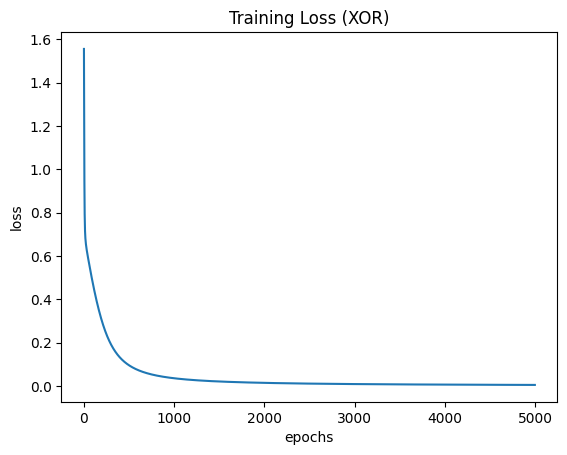

In [41]:
plt.plot(losses)
plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("Training Loss (XOR)")
plt.show()

Loss Curve

In [42]:
def plot_decision_boundary(X, y, params, activation="tanh"):
    x_min, x_max = -0.5, 1.5
    y_min, y_max = -0.5, 1.5

    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 300),
        np.linspace(y_min, y_max, 300)
    )

    grid = np.c_[xx.ravel(), yy.ravel()]
    preds, _ = forward_pass(grid, params, activation)
    preds = preds.reshape(xx.shape)

    plt.contourf(xx, yy, preds > 0.5, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y.flatten(), edgecolors="k", s=100)
    plt.title("Decision Boundary (XOR)")
    plt.show()

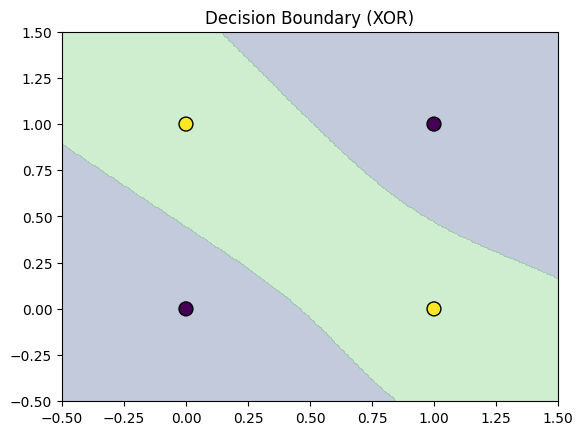

In [43]:
plot_decision_boundary(X, y, params)